In [ ]:
#/nfs/team205/ld21/renal/for_win

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scanpy as sc
import numpy as np
import pandas as pd
from matplotlib.pyplot import rc_context
import collections
pd.set_option('display.max_rows', 200)
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
#sc.logging.print_versions() #print version of package
sc.logging.print_header()
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=120, color_map='viridis')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.3 statsmodels==0.13.5 python-igraph==0.10.2 pynndescent==0.5.8


In [2]:
adata = sc.read('/home/jovyan/nfs_win/wt1/handover_covid/data/ESKD_stephenson_COMBAT_annotated.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 1696428 × 16482
    obs: 'sample_id', 'patient_id', 'study', 'celltypist', '_scvi_batch', '_scvi_labels', 'compartment', 'covid_status'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'celltypist_colors', 'neighbors', 'patient_id_colors', 'study_colors', 'umap'
    obsm: 'X_mde', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
list(adata.obs['sample_id'].unique())

['C116_0205',
 'C103_2204',
 'C123_0505',
 'C214_2705',
 'C40_0105',
 'C42_1504',
 'C104_2204',
 'C123_2404',
 'C124_0105',
 'C116_2304',
 'C124_2404',
 'C126_0605',
 'C106_2204',
 'C123_2904',
 'C124_2704',
 'C126_2504',
 'C127_0405',
 'C134_2904',
 'C126_3004',
 'C128_0405',
 'C142_3004',
 'C127_1105',
 'C128_1105',
 'C132_0205',
 'C152_0405',
 'C127_2504',
 'C161_1105',
 'C132_1105',
 'C20_1004',
 'C128_2504',
 'C164_1105',
 'C20_1404',
 'C132_2804',
 'C21_1004',
 'C21_1704',
 'C167_1205',
 'C20_1604',
 'C23_1004',
 'C31_1304',
 'C193_2605',
 'C21_2504',
 'C23_1504',
 'C23_2204',
 'C195_2605',
 'C31_2004',
 'C34_1404',
 'C36_1504',
 'C196_2605',
 'C31_2704',
 'C34_2104',
 'C93_0405',
 'C42_2204',
 'C40_1504',
 'C224_2805',
 'C34_2504',
 'C36_1704',
 'C197_2605',
 'C36_2104',
 'C40_2204',
 'C212_2705',
 'C116_2804',
 'C93_2104',
 'C113_0605',
 'C42_2704',
 'C234_2805',
 'C93_2704',
 'C113_2304',
 'C60_1604',
 'C237_2805',
 'C63_1704',
 'C60_2104',
 'C238_2905',
 'C113_2904',
 'C240_2

In [5]:
adata.obs['study'].unique()

['ESKD', 'Stephenson', 'COMBAT']
Categories (3, object): ['COMBAT', 'ESKD', 'Stephenson']

In [6]:
list(adata.obs['covid_status'].unique())

['COVID-19', 'Healthy']

In [7]:
adata.obs['compartment'].unique()

['B cell', 'Myeloid', 'T cell', NaN]
Categories (3, object): ['B cell', 'Myeloid', 'T cell']

In [8]:
list(adata.obs['celltypist'].unique())

['B_n-sw_mem',
 'Monocyte_CD16+C1',
 'Monocyte_CD14_IFN_stim',
 'B_sw_mem',
 'T_reg',
 'T_CD4_naive',
 'T_CD4_helper',
 'Monocyte_CD16',
 'Monocyte_CD14',
 'pDC',
 'NK',
 'T_CD8_CTL',
 'Cycling',
 'Plasma_cells',
 'T_CD8_EMRA',
 'cDC2',
 'B_naive',
 'NK_CD56',
 'B_n-sw_mem_IFN_stim',
 'Monocyte_CD16_IFN_stim',
 'T_CD8_CM',
 'T_CD4_naive_IFN_stim',
 'RBC',
 'T_CD8_naive',
 'MAIT',
 'T_gd',
 'Platelets',
 'T_CD4_CTL',
 'HPC',
 'B_invar',
 'NK_IFN_stim',
 'T_CD8_EM',
 'Plasmablasts',
 'NKT',
 'B_naive_IFN_stim',
 'ILC',
 'Monocyte_CD14_IL6',
 'cDC1',
 'T_CD8_CTL_IFN_stim']

In [9]:
len(list(adata.obs['celltypist'].unique()))

39

In [10]:
compartment ='B'

In [11]:
if compartment == 'B':
   selected_cells =['B_n-sw_mem',
  'B_sw_mem',
  'Plasma_cells',
  'B_naive',
  'B_n-sw_mem_IFN_stim',
  'B_invar',
  'Plasmablasts',
 'B_naive_IFN_stim']
    
elif compartment == 'T':
    selected_cells =[
 'T_reg',
 'T_CD4_naive',
 'T_CD4_helper',
 'NK',
 'T_CD8_CTL',
 'Cycling',
 'T_CD8_EMRA',
 'NK_CD56',
  'T_CD8_CM',
 'T_CD4_naive_IFN_stim',
  'T_CD8_naive',
 'MAIT',
 'T_gd',
 'T_CD4_CTL',
 'NK_IFN_stim',
 'T_CD8_EM',
 'NKT',
  'ILC',
  'T_CD8_CTL_IFN_stim'     
    ]
elif compartment == 'M':
    selected_cells=[ 'Monocyte_CD16+C1',
 'Monocyte_CD14_IFN_stim',
 'Monocyte_CD16',
 'Monocyte_CD14',
 'pDC',
 'cDC2',
 'Monocyte_CD16_IFN_stim',
 'RBC',
 'Platelets',
 'HPC',
 'Monocyte_CD14_IL6',
 'cDC1',
 ]

In [12]:
selected_cells

['B_n-sw_mem',
 'B_sw_mem',
 'Plasma_cells',
 'B_naive',
 'B_n-sw_mem_IFN_stim',
 'B_invar',
 'Plasmablasts',
 'B_naive_IFN_stim']

In [13]:
len(selected_cells)

8

# subseting adata for only selected cells

In [14]:
adata.n_obs

1696428

In [15]:
adata = adata[adata.obs['celltypist'].isin(selected_cells)]

In [16]:
adata.n_obs

157784

In [17]:
adata.obs['celltypist'].value_counts()

B_naive                114928
Plasma_cells            14731
B_sw_mem                14303
B_n-sw_mem               8145
B_invar                  2715
Plasmablasts             1385
B_naive_IFN_stim         1342
B_n-sw_mem_IFN_stim       235
Name: celltypist, dtype: int64

In [18]:
adata.obs['study'].unique()

['ESKD', 'Stephenson', 'COMBAT']
Categories (3, object): ['COMBAT', 'ESKD', 'Stephenson']

In [19]:
adata.obs['covid_status'].unique()

['COVID-19', 'Healthy']
Categories (2, object): ['COVID-19', 'Healthy']

# subset only covid positive

In [20]:
adata_subset = adata[(adata.obs['covid_status']=='COVID-19')]

In [21]:
adata_subset.obs['covid_status'].unique()

['COVID-19']
Categories (1, object): ['COVID-19']

In [22]:
adata_subset.obs['study'].unique()

['ESKD', 'Stephenson', 'COMBAT']
Categories (3, object): ['COMBAT', 'ESKD', 'Stephenson']

In [23]:
adata_subset.obs['renal_status']='non_renal'
adata_subset.obs.loc[adata_subset.obs['study']=='ESKD', "renal_status"] = 'renal'
adata_subset.obs['renal_status'] = adata_subset.obs['renal_status'].astype('category')

/tmp/ipykernel_4839/1175184823.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_subset.obs['renal_status']='non_renal'


In [24]:
adata_subset.obs['renal_status'].unique()

['renal', 'non_renal']
Categories (2, object): ['non_renal', 'renal']

# compositional plot

In [25]:
adata_subset.obs['celltypist'].value_counts()

B_naive                100870
Plasma_cells            13920
B_sw_mem                11351
B_n-sw_mem               6588
B_invar                  2186
Plasmablasts             1358
B_naive_IFN_stim         1337
B_n-sw_mem_IFN_stim       235
Name: celltypist, dtype: int64

In [26]:
df=pd.crosstab(adata_subset.obs['sample_id'],adata_subset.obs['celltypist']).apply(lambda r: r/r.sum(),axis=1)
df.head()

celltypist,B_invar,B_n-sw_mem,B_n-sw_mem_IFN_stim,B_naive,B_naive_IFN_stim,B_sw_mem,Plasma_cells,Plasmablasts
sample_id,,,,,,,,
AP1,0.009174,0.041284,0.000000,0.655963,0.000000,0.082569,0.206422,0.004587
AP2,0.047059,0.200000,0.000000,0.582353,0.000000,0.123529,0.041176,0.005882
AP3,0.161597,0.125475,0.119772,0.441065,0.036122,0.062738,0.053232,0.000000
AP4,0.009852,0.027915,0.000000,0.894910,0.000000,0.067323,0.000000,0.000000
AP5,0.018856,0.018856,0.000000,0.754876,0.000650,0.056567,0.143693,0.006502


In [27]:
new_dict=dict(zip(adata_subset.obs['sample_id'],adata_subset.obs['renal_status']))
new_dict

{'C116_0205': 'renal',
 'C123_0505': 'renal',
 'C42_1504': 'renal',
 'C40_0105': 'renal',
 'C116_2304': 'renal',
 'C124_0105': 'renal',
 'C123_2404': 'renal',
 'C123_2904': 'renal',
 'C126_0605': 'renal',
 'C124_2404': 'renal',
 'C127_0405': 'renal',
 'C126_2504': 'renal',
 'C124_2704': 'renal',
 'C128_0405': 'renal',
 'C127_1105': 'renal',
 'C126_3004': 'renal',
 'C132_0205': 'renal',
 'C128_1105': 'renal',
 'C127_2504': 'renal',
 'C132_1105': 'renal',
 'C20_1004': 'renal',
 'C128_2504': 'renal',
 'C20_1404': 'renal',
 'C132_2804': 'renal',
 'C21_1004': 'renal',
 'C20_1604': 'renal',
 'C21_1704': 'renal',
 'C23_1004': 'renal',
 'C21_2504': 'renal',
 'C31_1304': 'renal',
 'C23_1504': 'renal',
 'C23_2204': 'renal',
 'C31_2004': 'renal',
 'C34_1404': 'renal',
 'C31_2704': 'renal',
 'C36_1504': 'renal',
 'C34_2104': 'renal',
 'C40_1504': 'renal',
 'C42_2204': 'renal',
 'C93_0405': 'renal',
 'C36_1704': 'renal',
 'C34_2504': 'renal',
 'C116_2804': 'renal',
 'C40_2204': 'renal',
 'C36_2104'

In [28]:
df2=df.copy()

In [29]:
df2['renal_status']=[new_dict[x] for x in df2.index]

In [30]:
df2.head()

celltypist,B_invar,B_n-sw_mem,B_n-sw_mem_IFN_stim,B_naive,B_naive_IFN_stim,B_sw_mem,Plasma_cells,Plasmablasts,renal_status
sample_id,,,,,,,,,
AP1,0.009174,0.041284,0.000000,0.655963,0.000000,0.082569,0.206422,0.004587,non_renal
AP2,0.047059,0.200000,0.000000,0.582353,0.000000,0.123529,0.041176,0.005882,non_renal
AP3,0.161597,0.125475,0.119772,0.441065,0.036122,0.062738,0.053232,0.000000,non_renal
AP4,0.009852,0.027915,0.000000,0.894910,0.000000,0.067323,0.000000,0.000000,non_renal
AP5,0.018856,0.018856,0.000000,0.754876,0.000650,0.056567,0.143693,0.006502,non_renal


In [31]:
subset_renal = df2[df2['renal_status']=='renal'].copy()

In [32]:
subset_non_renal = df2[df2['renal_status']=='non_renal'].copy()

In [33]:
subset_renal.drop('renal_status',axis=1, inplace=True)

In [34]:
subset_renal.head()

celltypist,B_invar,B_n-sw_mem,B_n-sw_mem_IFN_stim,B_naive,B_naive_IFN_stim,B_sw_mem,Plasma_cells,Plasmablasts
sample_id,,,,,,,,
C20_1004,0.005658,0.018388,0.001414,0.700141,0.072136,0.053748,0.138614,0.009901
C20_1404,0.008610,0.027675,0.011070,0.575646,0.231857,0.097786,0.046125,0.001230
C20_1604,0.006000,0.030667,0.005333,0.778000,0.016667,0.097333,0.064000,0.002000
C21_1004,0.026971,0.058091,0.000000,0.508299,0.018672,0.172199,0.195021,0.020747
C21_1704,0.015060,0.042169,0.001506,0.212349,0.004518,0.109940,0.573795,0.040663


In [35]:
subset_non_renal.drop('renal_status',axis=1, inplace=True)
subset_non_renal.head()

celltypist,B_invar,B_n-sw_mem,B_n-sw_mem_IFN_stim,B_naive,B_naive_IFN_stim,B_sw_mem,Plasma_cells,Plasmablasts
sample_id,,,,,,,,
AP1,0.009174,0.041284,0.000000,0.655963,0.000000,0.082569,0.206422,0.004587
AP2,0.047059,0.200000,0.000000,0.582353,0.000000,0.123529,0.041176,0.005882
AP3,0.161597,0.125475,0.119772,0.441065,0.036122,0.062738,0.053232,0.000000
AP4,0.009852,0.027915,0.000000,0.894910,0.000000,0.067323,0.000000,0.000000
AP5,0.018856,0.018856,0.000000,0.754876,0.000650,0.056567,0.143693,0.006502


In [36]:
res1 = subset_renal.mean(axis = 0)
res2 = subset_non_renal.mean(axis = 0)
res = pd.DataFrame([res2,res1], index = ['non_ESKD', 'ESKD'])
res

celltypist,B_invar,B_n-sw_mem,B_n-sw_mem_IFN_stim,B_naive,B_naive_IFN_stim,B_sw_mem,Plasma_cells,Plasmablasts
non_ESKD,0.013065,0.026823,0.000868,0.770022,0.003404,0.063535,0.114176,0.008108
ESKD,0.041980,0.112263,0.004235,0.464808,0.030895,0.189939,0.148869,0.007011


In [37]:
res.columns

Index(['B_invar', 'B_n-sw_mem', 'B_n-sw_mem_IFN_stim', 'B_naive',
       'B_naive_IFN_stim', 'B_sw_mem', 'Plasma_cells', 'Plasmablasts'],
      dtype='object', name='celltypist')

In [38]:
if compartment == 'T':
    res1=res[['ILC', 'MAIT', 'NK', 'NK_CD56','NKT',  'NK_IFN_stim',
       'T_CD4_CTL', 'T_CD4_helper', 'T_CD4_naive','Cycling', 'T_CD4_naive_IFN_stim',
       'T_CD8_CM', 'T_CD8_CTL', 'T_CD8_CTL_IFN_stim', 'T_CD8_EM', 'T_CD8_EMRA',
       'T_CD8_naive', 'T_gd', 'T_reg']]
elif compartment == 'M':
     res1 =res[[ 'Monocyte_CD14', 'Monocyte_CD14_IFN_stim', 'Monocyte_CD14_IL6',
       'Monocyte_CD16', 'Monocyte_CD16+C1', 'Monocyte_CD16_IFN_stim','cDC1', 'cDC2', 'pDC',
       'Platelets', 'RBC', 'HPC',]]
else:
    res1 =res[[ 'Plasma_cells', 'Plasmablasts','B_invar','B_naive',
       'B_naive_IFN_stim', 'B_n-sw_mem', 'B_n-sw_mem_IFN_stim',  'B_sw_mem',]]

In [39]:
if compartment == 'T':
    mycolor =['#FFF7BC',
'#FEE391',
'#FEC44F',
'#FE9929',
'#EC7014',
'#ec8e14',
'#CC4C02',
'#993404',
'#662506',
'#FCBBA1',
'#fcc7a1',
'#fcd3a1',
'#FC9272',
'#fca972',
'#EF3B2C',
'#FB6A4A',
'#CB181D',
'#A50F15',
'#67000D']
elif compartment == 'M':
    mycolor=['#C6DBEF',
'#6BAED6',
'#4292C6',
'#08519C',
'#08306B',
'olivedrab',
'chartreuse',
'#74C476',
'palegreen',
'#238B45',
'limegreen',
'#00441B']
    
else:
    mycolor =['navy',
      'cyan',
       'darkcyan',
        'aquamarine',
        '#D8DAEB',
        '#B2ABD2',
        '#8073AC',
       '#542788']

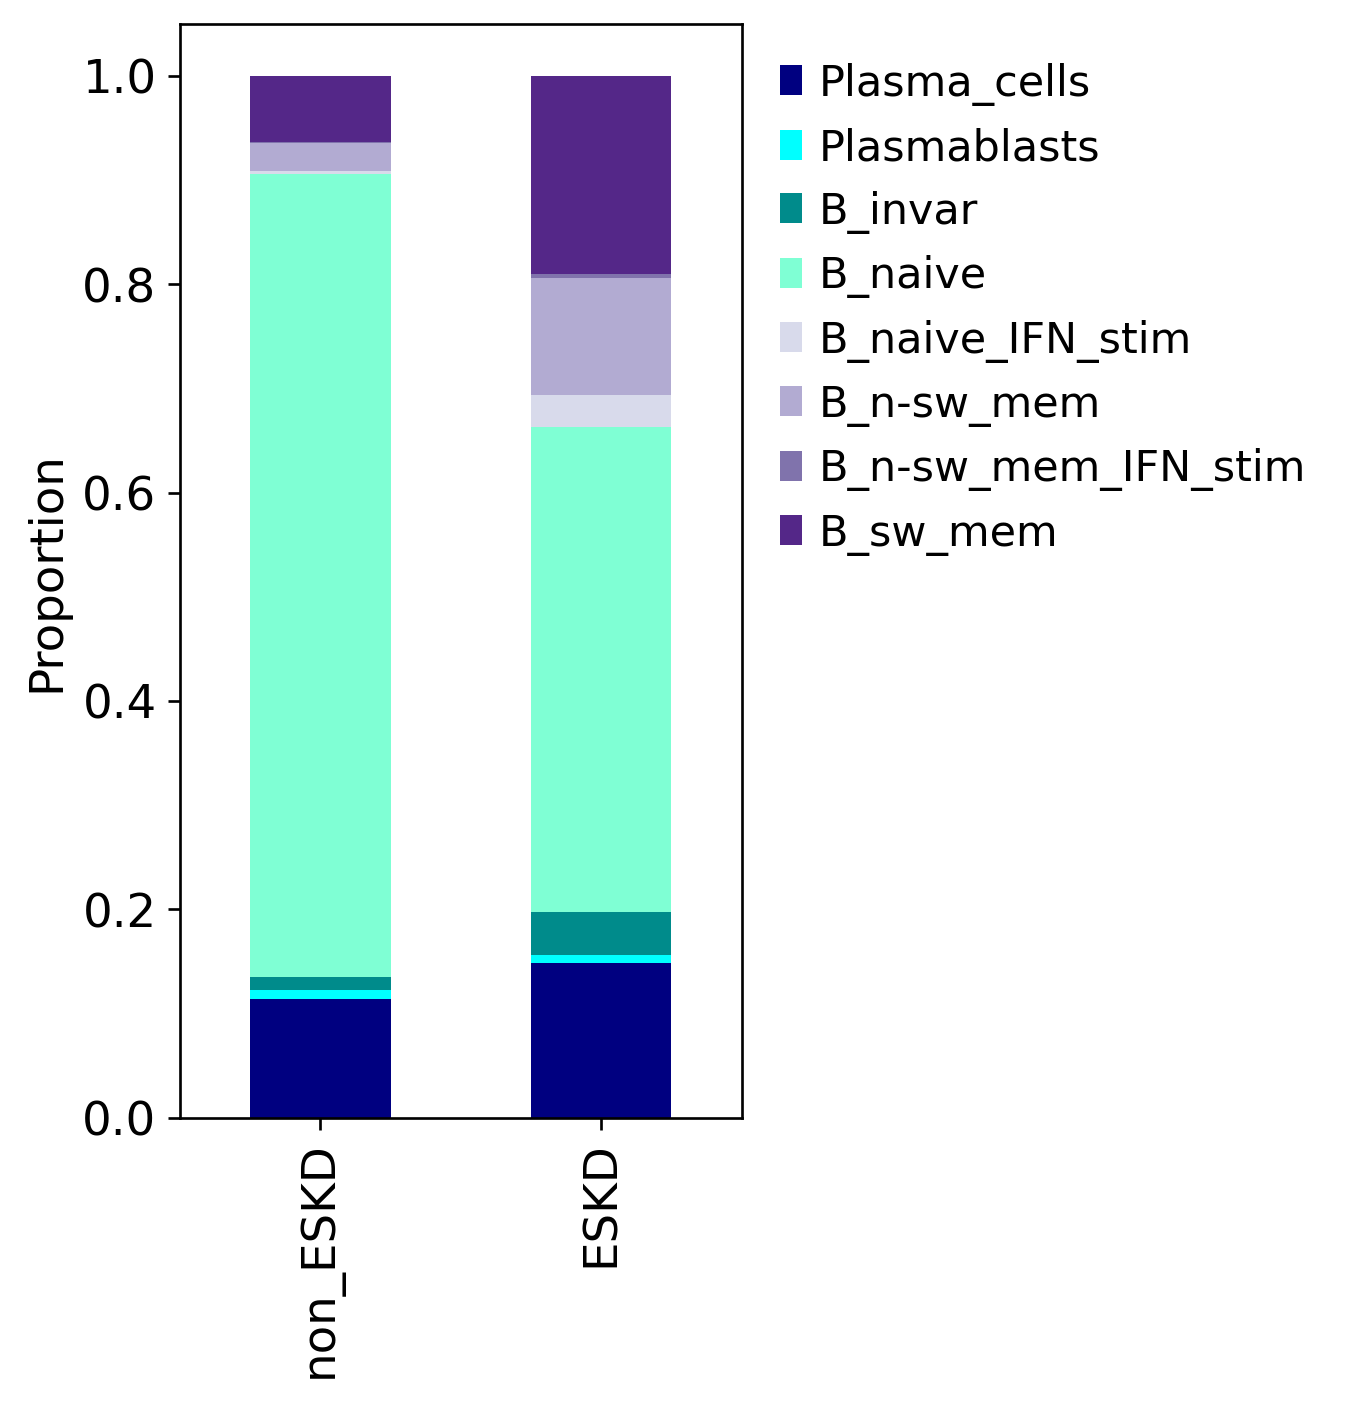

In [40]:
import matplotlib.pyplot as plt
res1.plot.bar(stacked = True,color=mycolor,figsize=(3,6))
lgd=plt.legend(bbox_to_anchor = (1,1), frameon = False)
plt.grid(False)
plt.ylabel('Proportion')
if compartment == 'B':
    plt.savefig('B_proportion.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
elif compartment == 'T':
    plt.savefig('T_proportion.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
    
elif compartment == 'M':
    plt.savefig('M_proportion.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')

In [41]:
from scipy.stats import ranksums
pval =[]
for i in range (0, len(subset_renal.columns)):
    print(subset_renal.columns[i])
    print (subset_non_renal.columns[i])
    print(ranksums(subset_renal[subset_renal.columns[i]], subset_non_renal[subset_non_renal.columns[i]]))
    p = ranksums(subset_renal[subset_renal.columns[i]], subset_non_renal[subset_non_renal.columns[i]])
    pval.append(p[1])
pval

B_invar
B_invar
RanksumsResult(statistic=8.189634666268248, pvalue=2.620203041361921e-16)
B_n-sw_mem
B_n-sw_mem
RanksumsResult(statistic=8.424341733599677, pvalue=3.627840087359024e-17)
B_n-sw_mem_IFN_stim
B_n-sw_mem_IFN_stim
RanksumsResult(statistic=3.2134584897599314, pvalue=0.001311467535258636)
B_naive
B_naive
RanksumsResult(statistic=-8.58854009346117, pvalue=8.808133520843817e-18)
B_naive_IFN_stim
B_naive_IFN_stim
RanksumsResult(statistic=3.4752099928332534, pvalue=0.0005104535928102861)
B_sw_mem
B_sw_mem
RanksumsResult(statistic=7.669995150941874, pvalue=1.720028521860529e-14)
Plasma_cells
Plasma_cells
RanksumsResult(statistic=0.9282036695699712, pvalue=0.3533019313117365)
Plasmablasts
Plasmablasts
RanksumsResult(statistic=-1.847714484794334, pvalue=0.06464365742601318)


[2.620203041361921e-16,
 3.627840087359024e-17,
 0.001311467535258636,
 8.808133520843817e-18,
 0.0005104535928102861,
 1.720028521860529e-14,
 0.3533019313117365,
 0.06464365742601318]

In [42]:
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import FloatVector

stats = importr('stats')
pvalue_list=pval
p_adjust = stats.p_adjust(FloatVector(pvalue_list), method = 'fdr')
print(p_adjust)


[1] 6.987208e-16 1.451136e-16 1.748623e-03 7.046507e-17 8.167257e-04
[6] 3.440057e-14 3.533019e-01 7.387847e-02



In [ ]:
import seaborn as sns

In [ ]:
df2.head()

In [ ]:
df3 = df2.melt(ignore_index =False, id_vars = 'renal_status')
df3

In [ ]:
df3.rename(columns={"value": "proportion"},inplace=True)
df3

In [ ]:
sns.boxplot(data = df3, x = 'celltypist', y = 'proportion', hue = 'renal_status')

In [ ]:
from matplotlib.pyplot import figure
color =['#FB00B2',
'#73B247']
figure(figsize=(14, 6), dpi=80)
ax = sns.swarmplot(data = df3, palette=color,x = 'celltypist', y = 'proportion', hue = 'renal_status', dodge=True)
sns.boxplot(data = df3, palette=color,x = 'celltypist', y = 'proportion', hue = 'renal_status', ax = ax)
plt.legend(bbox_to_anchor = (1,1), frameon = False)
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
#plt.savefig('/home/jovyan/scripts/renal_covid_19/renal_vs_non_renal/figures/Mcell_renal_non_renal.pdf')